# 1 Quantum States and Qubits

## 1.1 Introduction  



A quantum state can be represented by using a **Bloch Sphere**, as shown in the figure.
![Bloch Sphere](https://qiskit.org/textbook/ch-states/images/bloch.png "Bloch Sphere")

## 1.2 The Atoms of Computation  

Import some necessary libraries and packages

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [2]:
# install qiskit_textbook if not installed already
#! pip install ./qiskit-textbook-src/
from qiskit_textbook.widgets import binary_widget

In [3]:
binary_widget(nbits=3)

HTML(value='<pre>Binary  Decimal\n 000 = 0</pre>')

### First quantum circuit

In a circuit, we typically __need to do three jobs__:
   * encode the input;
   * do some actual computation;
   * finally extract an output.

## Let's build a quantum circuit which has **eight qubits** of input and eight outputs.

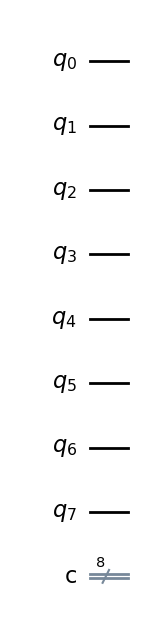

In [4]:
n = 8
# Number of qubits
n_q = n 
# Number of bits
n_b = n
qc_output = QuantumCircuit(n_q, n_b)
# look at teh circuit
qc_output.draw(output='mpl')

## Apply measure operation on each qubit

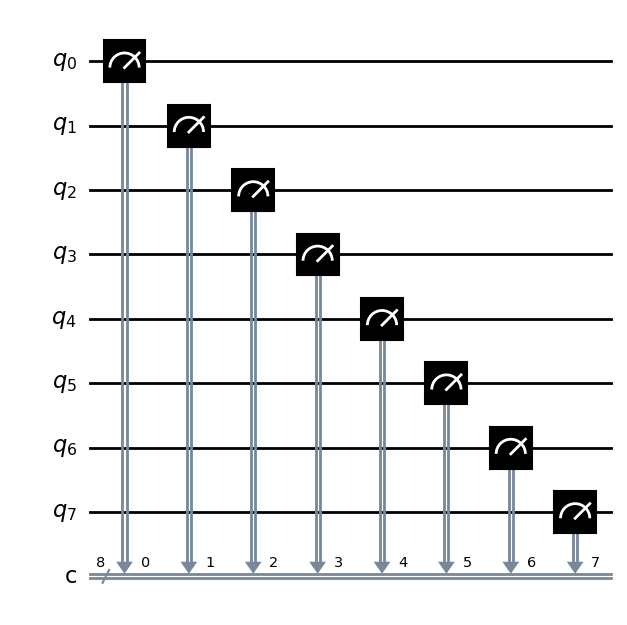

In [5]:
# apply measure operation on each qubit
for j in range(n):
    qc_output.measure(j,j)
# draw the quantum circuit
qc_output.draw(output='mpl')

So, as we can see from above, let's say **measure(0,0)** applies measurement operation on **qubit 0** and puts a corresponding output/ value on the **classical bit 0**. 

## To run the circuit on a quantum device we need a quantum computing unit, here we use the Quantum Simulator **Aer** of Qiskit

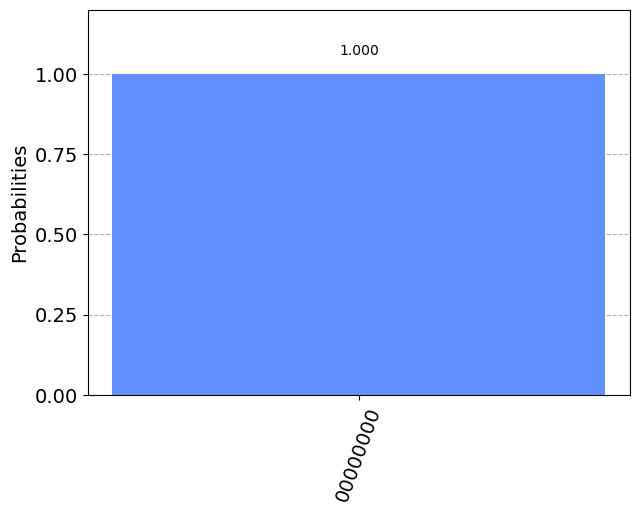

In [6]:
# define the quantum simulator
sim = Aer.get_backend('aer_simulator')
# create a quantum object from the quantum circuit by using Qiskit's **assemble** to run this opject later on this quantum simulator
qobj = assemble(qc_output)
# run the quantum object on the prepared quantum simulator **sim** and then get the result
result = sim.run(qobj).result()
# from the results, we get a dictionary containing the number of times (counts) each result appeared
counts = result.get_counts()
# plot the resulting counts in a histogram
plot_histogram(counts)

Qubits are always initialized to give the output 0. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. 
In other words, the quentum circuits will be initialized as a default such that all qubits are at |0> state and if we don't do anything to them, but just perform measurement operations on each qubit one by one, we get the obvious result that the probability of all qubits being in a quantum state |0> is 1 . 

In [7]:
counts

{'00000000': 1024}

## 4. Example: Creating an Adder Circuit

### 4.1 Encoding an input

We learn,
* how to encode a different binary string as an input.
* for this, we need a NOT gate.
* for **qubits**, the corresponding operation is called **X** 

### Create a new circuit which does the encoding

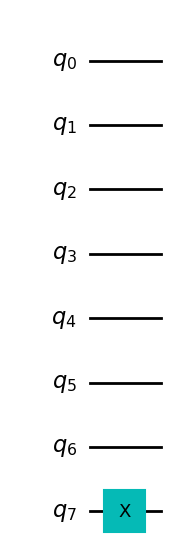

In [8]:
# define the quantum circuit
# with n qubits, here n=8 from earlier assignment
qc_encode = QuantumCircuit(n)
# apply the quantum NOT gate, ie. X gate on 8th qubit, q7
qc_encode.x(7)
# display the circuit
qc_encode.draw(output='mpl')

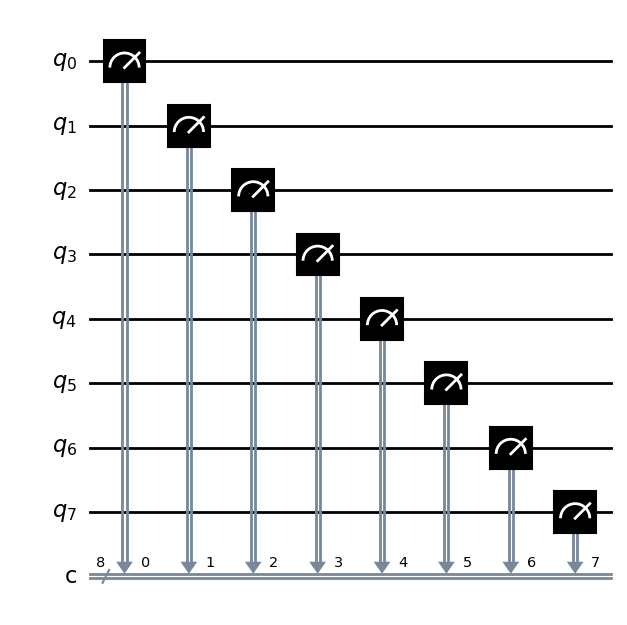

In [9]:
# plot qc_output
qc_output.draw(output='mpl')

### Let's add these two quantum circuits together

<ipython-input-10-7ca72beaa1e4>:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc_encode + qc_output
C:\Users\Abdurahman\miniconda3\envs\qiskit\lib\site-packages\qiskit\circuit\quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


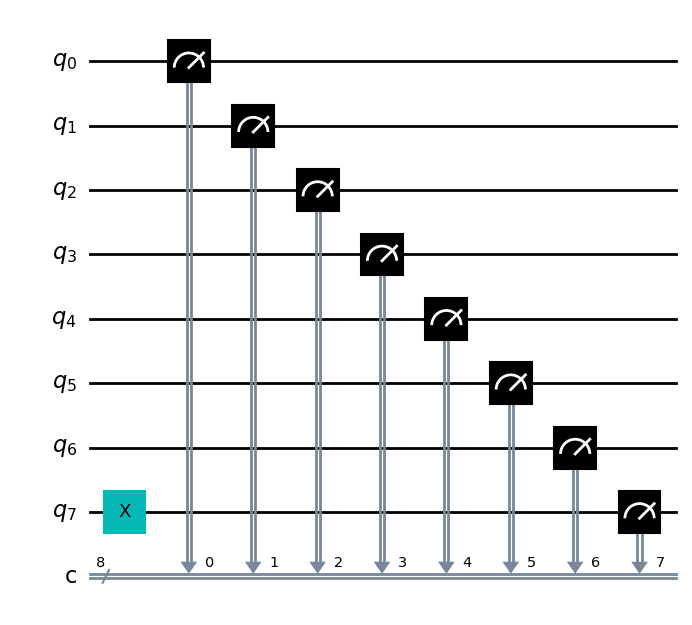

In [10]:
# add qc_output and qc_encode
qc = qc_encode + qc_output
# draw qc
qc.draw(output='mpl')

### Run this circuit **qc** on the quantum backend 

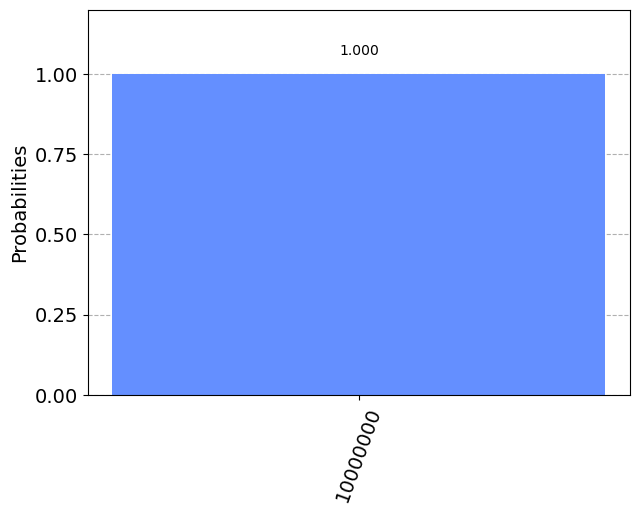

In [11]:
# create the corresponding quantum object, which then can be run on the quantum cimulator
qobj = assemble(qc) 
# run the qobj on the simulator backend
counts = sim.run(qobj).result().get_counts()
# plot the counts as a histogram
plot_histogram(counts)

### Another test

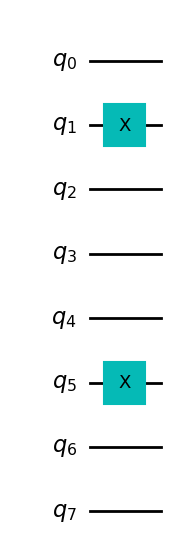

In [12]:
# 8 qubit quantum circuit
qc_encode = QuantumCircuit(n)
# X gate on q1 and q5
qc_encode.x(1)
qc_encode.x(5)
# draw the circuit
qc_encode.draw(output='mpl')

In [13]:
# The encoded binary is  00100010
2**5 + 2**1

34

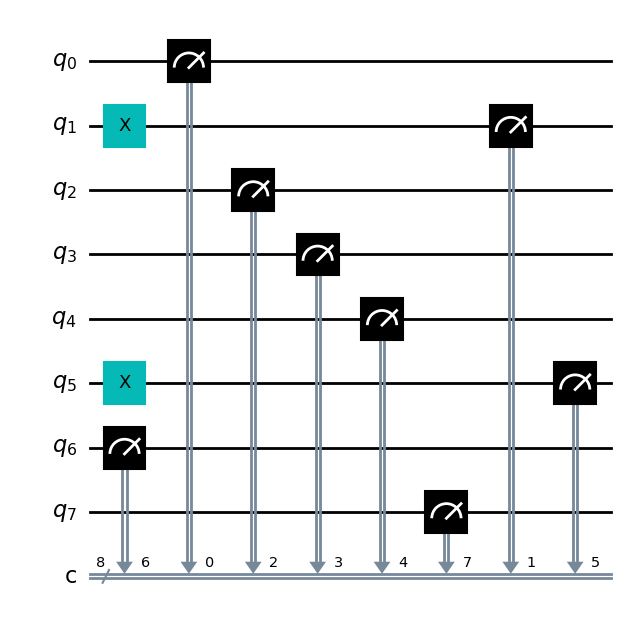

In [14]:
# add the circuit of measurement operation qc_output to the above circuit qc_encode
qc = qc_encode + qc_output
# look at the circuit
qc.draw(output='mpl')

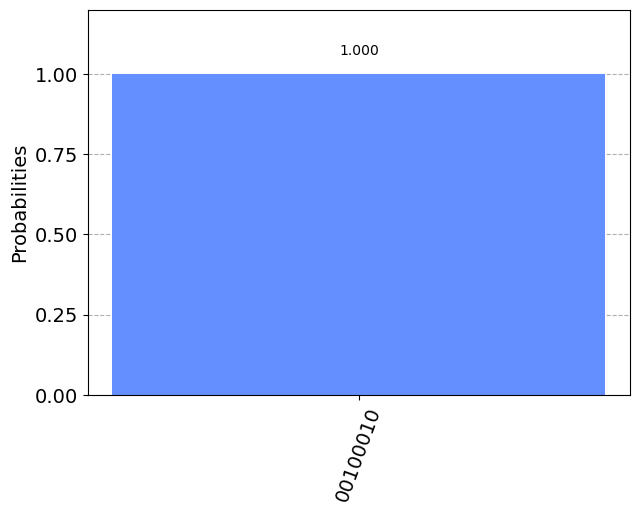

In [15]:
# create the quantum object
qobj = assemble(qc)
# run this quantum object qobj on the quantum simulator sim
counts = sim.run(qobj).result().get_counts()
# plot the resulted counts as a histogram
plot_histogram(counts)

The above quantum circuit **qc_encode** encode the binary number **00100010** on a 8 bit computer, it equals to **34** in decimal.


## 4.3 Adding with Qiskit

## Basic perinciple of the addition operation in binary system of {0, 1}  

## half adder <a class="anchor" id="half-adder"></a>
0+0 =00  (in decimal, this is 0+0=0)  
0+1=01 (in decimal, this is 0+1=1)  
1+0=01 (in decimal, this is 1+0=1)  
1+1=10 (in decimal, this is 1+1=2)  

Make own **half adder** using Qiskit. Thi will include,   
* a part of the circuit that encodes the input  
* a part that executes the algorithm  
* a part that extract the result  

The **rightmost bit** is **0** if the two inputs are the same, **1** otherwise. 
To implement this controlling feature, in Qiskit the **Controlled-NOT** gate, for short **CNOT** gate will be used.  
In the code it is the **cx** gate. 

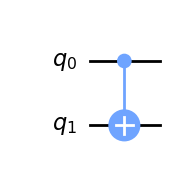

In [16]:
# define the circuit
qc_cnot =QuantumCircuit(2)  
# apply the cx gate, which acts on a pair of qubits.
# One acts as a control qubit (the one with the little dot),
# the second one acts as a target qubit (the one with the big circle and + sign inside it.)
#
# The cx will do the following: 
# applies the NOT gate on the target qubit if the control qubit is 1, and does nothing otherwise.
qc_cnot.cx(0,1)
# draw the circuit
qc_cnot.draw(output='mpl')

### Test the CNOT

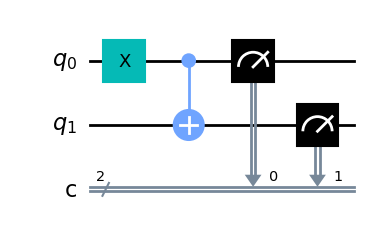

In [17]:
# define a circuit with two qubits and two classical bits
qc = QuantumCircuit(2,2)
# apply the NOT gate, ie. the X gate on the first qubit q0
qc.x(0)
# apply the CNOT gate on q0 and q1 such that
# cx(q0, q1) q0 is the control qubit, q1 is the target qubit
qc.cx(0,1)
# do measurements
# measure the q0 and give its result on the classical bit c0
qc.measure(0,0)
# measure the q1 and give its result on the classical bit c1
qc.measure(1,1)
# draw the circuit
qc.draw(output='mpl')

### Let'S execute this circuit  

Since the **x** gate is applied on q0 --> q0=|1> now and the q0 is set as control qubit in the **CNOT** operation by **cx(0,1)**, the output of the circuit should read as |11> . 
Because **NOT** operation is applied to the target for **q0=|1>**

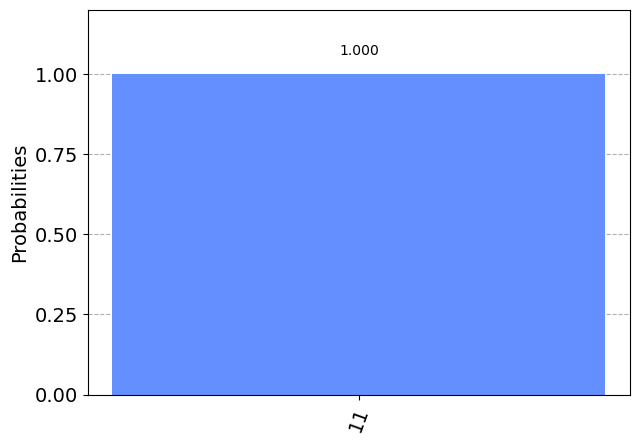

In [18]:
# create teh quantum object
qobj = assemble(qc)
# run this quantum object on quantum simulator sim
counts = sim.run(qobj).result().get_counts()
# plot the counts as a histogram
plot_histogram(counts)

So, we can see that the above circuit with the **CNOT** gate can realizes if the two inputs of the **CNOT** are the same or not.  
For the had adder, instead of overwriting one of the inputs, we can write the result on a different pair of qubits.  For this we can use **two CNOTs**. 

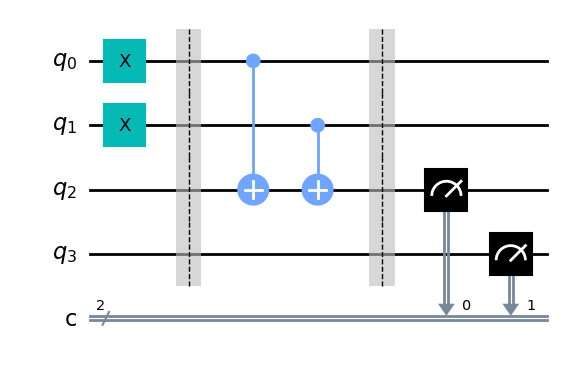

In [19]:
# define the cirquit qc_ha for the half adder
# with four qubits and two classical bits
qc_ha =QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # This line makes q0 = |1> 
qc_ha.x(1) # This line makes q1 = |1>
# draw a barrier
qc_ha.barrier()
# use two CNOTs to write the XOR of the inputs on qubit 2, q2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
#draw a barrier
qc_ha.barrier()
# now extract outputs
# measure the q2 and q3 and put their outputs to c0, c1 respectively.
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)
# draw the circuit
qc_ha.draw(output='mpl')

## Check this circuit if it can be used for our purpose, it is the XOR gate for two qubits  

if q0 = |0> and q1 = |0>

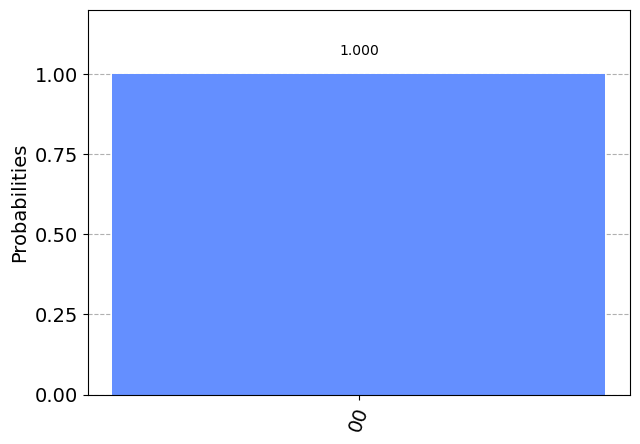

In [20]:
# define the cirquit qc_ha for the half adder
# with four qubits and two classical bits
qc_ha_00 =QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
#qc_ha.x(0) # This line makes q0 = |1> 
#qc_ha.x(1) # This line makes q1 = |1>
# draw a barrier
qc_ha_00.barrier()
# use two CNOTs to write the XOR of the inputs on qubit 2, q2
qc_ha_00.cx(0,2)
qc_ha_00.cx(1,2)
#draw a barrier
qc_ha_00.barrier()
# now extract outputs
# measure the q2 and q3 and put their outputs to c0, c1 respectively.
qc_ha_00.measure(2,0) # extract XOR value
qc_ha_00.measure(3,1)
# 
# execute the circuit on a quantum simulator, it is sim
qobj_00 = assemble(qc_ha_00)
# run it on sim
counts_00 = sim.run(qobj_00).result().get_counts()
# plot the counts
plot_histogram(counts_00)


if q0 = |0> and q1 = |1>


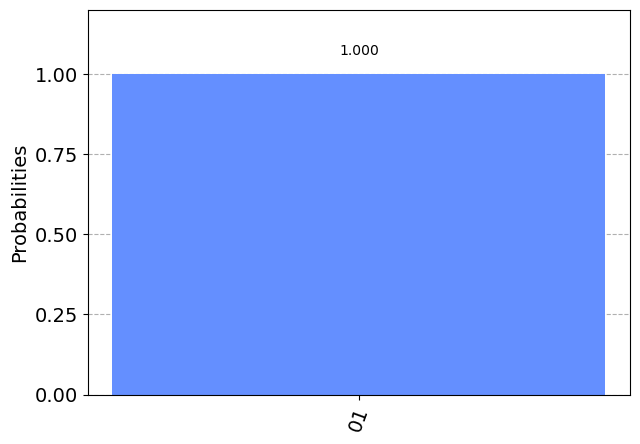

In [21]:
# define the cirquit qc_ha for the half adder
# with four qubits and two classical bits
qc_ha_01 =QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha_01.x(1) # This line makes q1 = |1>
# draw a barrier
qc_ha_01.barrier()
# use two CNOTs to write the XOR of the inputs on qubit 2, q2
qc_ha_01.cx(0,2)
qc_ha_01.cx(1,2)
#draw a barrier
qc_ha_01.barrier()
# now extract outputs
# measure the q2 and q3 and put their outputs to c0, c1 respectively.
qc_ha_01.measure(2,0) # extract XOR value
qc_ha_01.measure(3,1)
# 
# execute the circuit on a quantum simulator, it is sim
qobj_01 = assemble(qc_ha_01)
# run it on sim
counts_01 = sim.run(qobj_01).result().get_counts()
# plot the counts
plot_histogram(counts_01)


if q0 = |1> and q1 = |0>


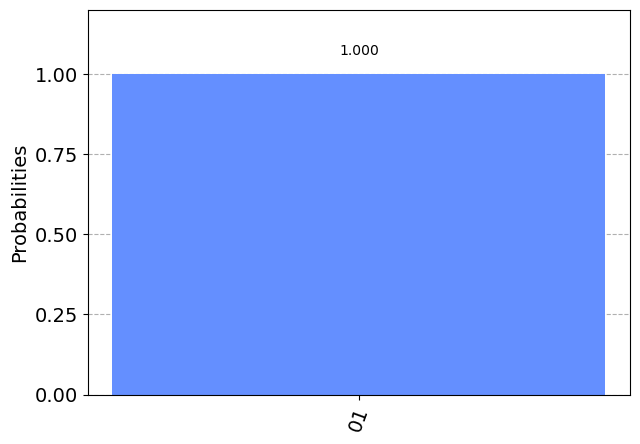

In [22]:
# define the cirquit qc_ha for the half adder
# with four qubits and two classical bits
qc_ha_10 =QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha_10.x(0) # This line makes q0 = |1> 
# draw a barrier
qc_ha_10.barrier()
# use two CNOTs to write the XOR of the inputs on qubit 2, q2
qc_ha_10.cx(0,2)
qc_ha_10.cx(1,2)
#draw a barrier
qc_ha_10.barrier()
# now extract outputs
# measure the q2 and q3 and put their outputs to c0, c1 respectively.
qc_ha_10.measure(2,0) # extract XOR value
qc_ha_10.measure(3,1)
# 
# execute the circuit on a quantum simulator, it is sim
qobj_10 = assemble(qc_ha_10)
# run it on sim
counts_10 = sim.run(qobj_10).result().get_counts()
# plot the counts
plot_histogram(counts_10)


if q0 = |1> and q1 = |1>


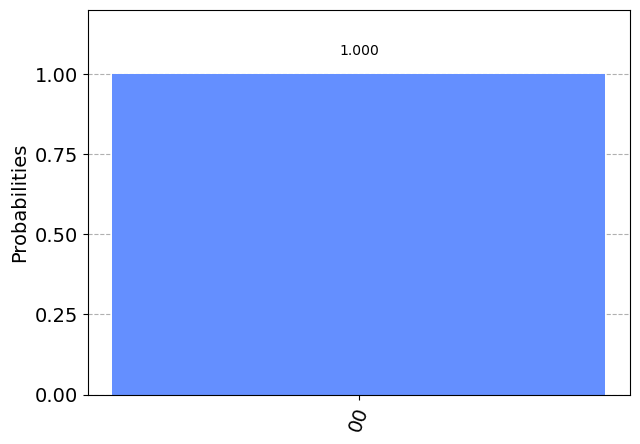

In [23]:
# define the cirquit qc_ha for the half adder
# with four qubits and two classical bits
qc_ha_11 =QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha_11.x(0) # This line makes q0 = |1> 
qc_ha_11.x(0) # This line makes q0 = |1> 
# draw a barrier
qc_ha_11.barrier()
# use two CNOTs to write the XOR of the inputs on qubit 2, q2
qc_ha_11.cx(0,2)
qc_ha_11.cx(1,2)
#draw a barrier
qc_ha_11.barrier()
# now extract outputs
# measure the q2 and q3 and put their outputs to c0, c1 respectively.
qc_ha_11.measure(2,0) # extract XOR value
qc_ha_11.measure(3,1)
# 
# execute the circuit on a quantum simulator, it is sim
qobj_11 = assemble(qc_ha_11)
# run it on sim
counts_11 = sim.run(qobj_11).result().get_counts()
# plot the counts
plot_histogram(counts_11)

From the above checking we can see that the output of q2, which is 0 if the two inputs q0, q1 are the same and 1 if they are different, fullfiled the first half of hald adder algorithm. Now the other half of the half adder algorithm is that as shown in the [**four possible sums**](#half-adder), the left digit is alway 0 and ONLY 1 if the both of the two inputs are 1. In the circuit we have to achive a task such that the qubit q3 gives the output value of 1, if and only if q0 and q1 are 1. In Qiskit we can use the **Toffoli gate**. Which is like a AND gate. So, if q0 = |1> AND q1 = |1>, then flip the q3 from |0> into |1> .  

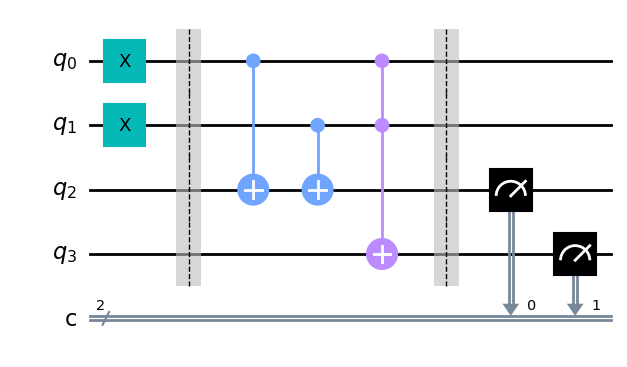

In [24]:
# define the circuit with four qubits and two classical bits
qc_ha = QuantumCircuit(4,2)
# encode the inputs q0 and q1
# apply the x gate on q0 and q1
qc_ha.x(0)
qc_ha.x(1)
# draw a barrier
qc_ha.barrier()
# apply CNOT gates on q0, q1 with the same target qubit q2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# now apply the Toffoli gate, in Qiskit it is ccx gate 
# set q0, q1 are the control qubits and q3 is the target qubit
# if both of the control qubits q0 and q1 are at the quantum state |1>,
# then q3 will be flipped 
qc_ha.ccx(0,1,3)
# draw a barrier
qc_ha.barrier()
#
# Now measure the q2, q3 and put the outputs into the classical bits c0 and c1, respectively.
qc_ha.measure(2,0)
qc_ha.measure(3,1)
#
# draw the circuit
qc_ha.draw(output='mpl')

### Execute this circuit on the quantum simulator sim

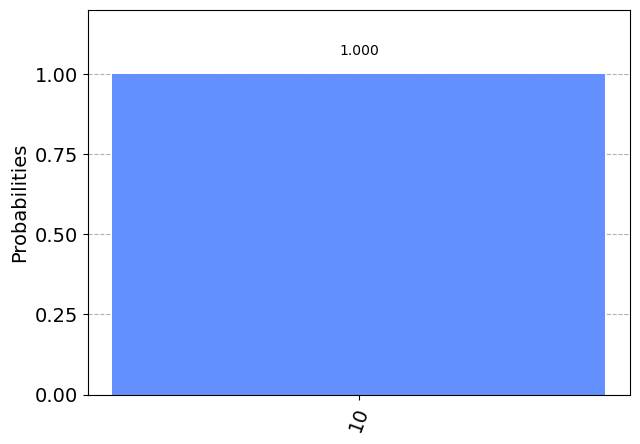

In [25]:
# create the quantum object
qobj_11 = assemble(qc_ha)
# run it
counts = sim.run(qobj_11).result().get_counts()
# plot the histogram
plot_histogram(counts)

# hu hu !!!  

# We did it, we added the binary addition 1+1 on a quantum circuit by simply encoding these two inputs as a input qubits. For that we used a quantum half adder algorithm.

# The Qiskit version table

In [26]:
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\Abdurahman\miniconda3\envs\qiskit\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
